In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


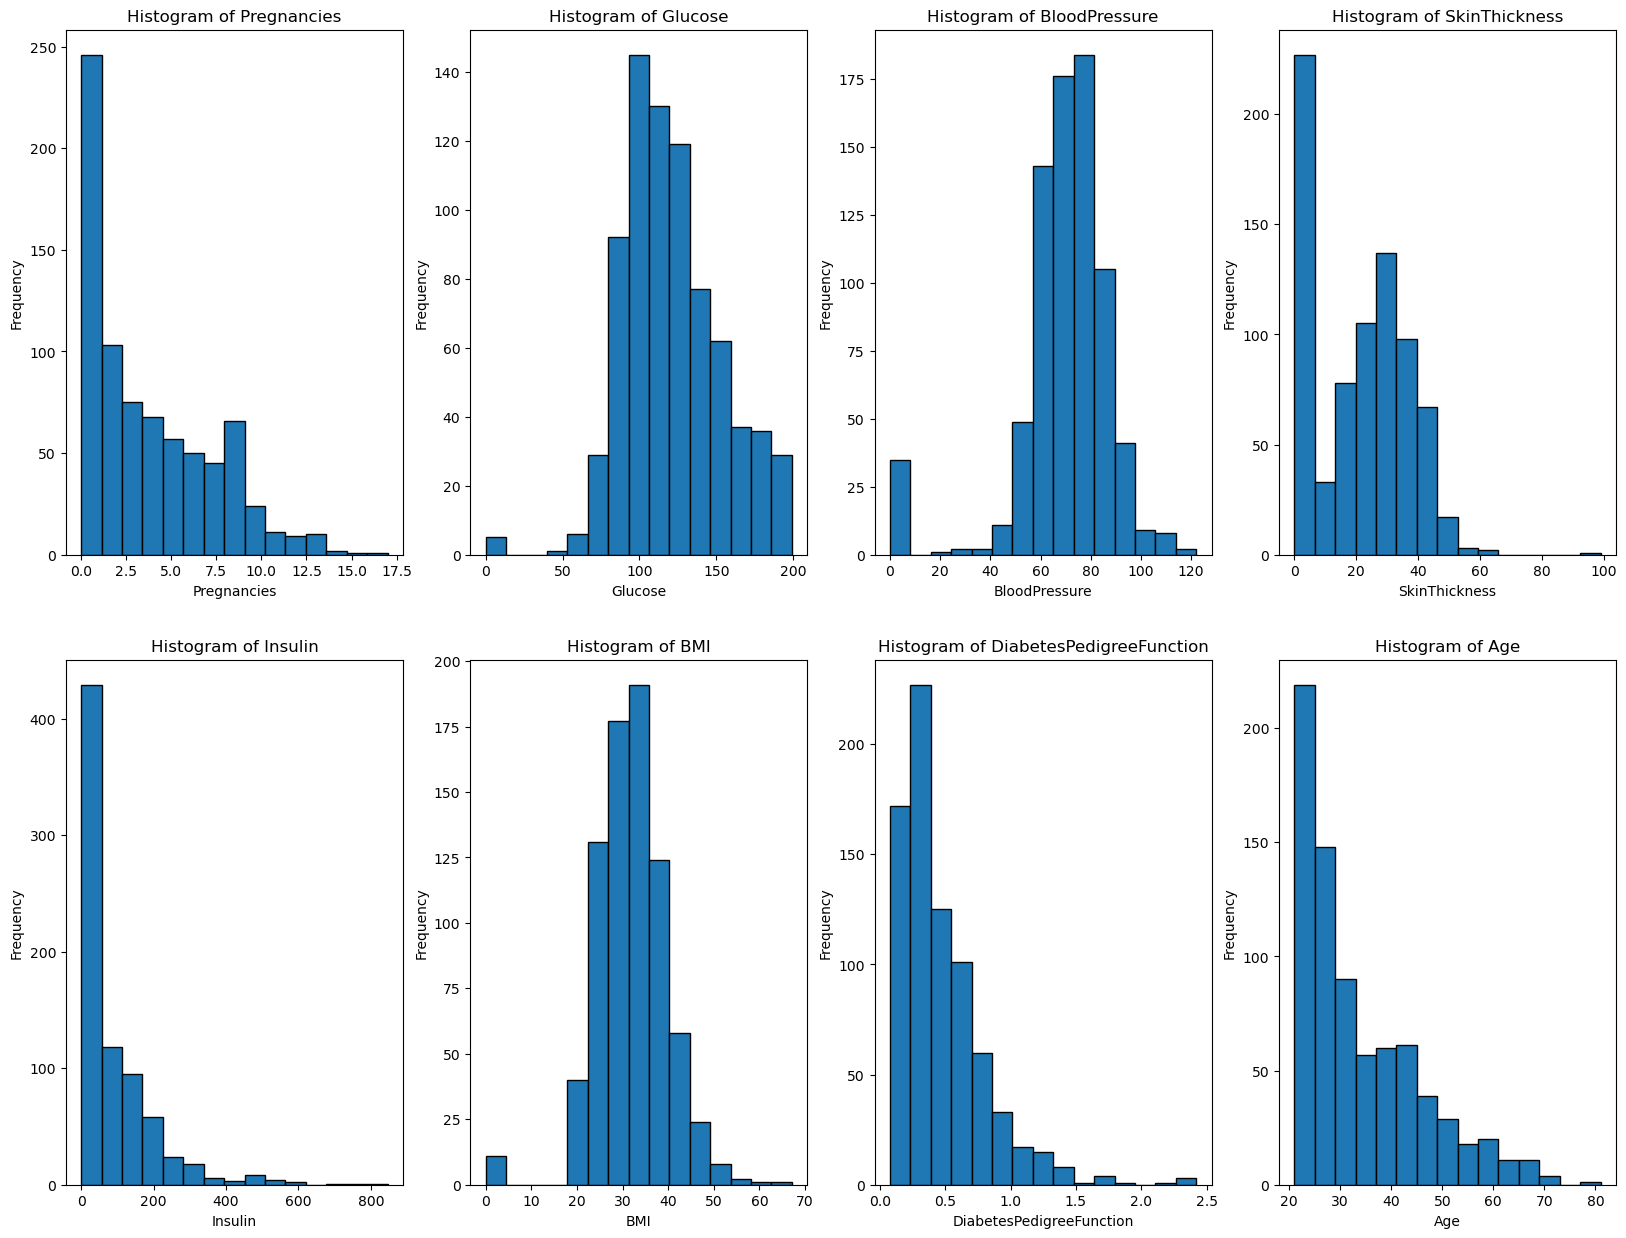

In [4]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 4, 1)
plt.hist(df['Pregnancies'], bins=15, edgecolor='black')
plt.title('Histogram of Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')

plt.subplot(2, 4, 2)
plt.hist(df['Glucose'], bins=15, edgecolor='black')
plt.title('Histogram of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')

plt.subplot(2, 4, 3)
plt.hist(df['BloodPressure'], bins=15, edgecolor='black')
plt.title('Histogram of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')

plt.subplot(2, 4, 4)
plt.hist(df['SkinThickness'], bins=15, edgecolor='black')
plt.title('Histogram of SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')

plt.subplot(2, 4, 5)
plt.hist(df['Insulin'], bins=15, edgecolor='black')
plt.title('Histogram of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')

plt.subplot(2, 4, 6)
plt.hist(df['BMI'], bins=15, edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(2, 4, 7)
plt.hist(df['DiabetesPedigreeFunction'], bins=15, edgecolor='black')
plt.title('Histogram of DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')

plt.subplot(2, 4, 8)
plt.hist(df['Age'], bins=15, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot: >

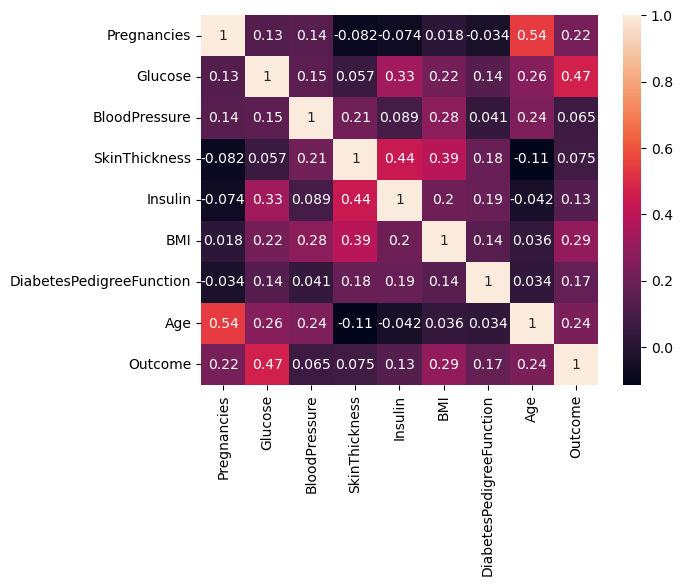

In [5]:
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)

### THE FEATURES WITH THE STRONGEST POSITIVE CORRELATION ARE THE FOLLOWING : 
 + Pregnancies and Age

In [6]:
Scaler = StandardScaler()
scaled_df = Scaler.fit_transform(df.drop(columns='Outcome'))
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[:-1])
scaled_df['target'] = df['Outcome'].values

In [7]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [8]:
x = scaled_df.drop(columns=['target'])
y = scaled_df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred)

In [15]:
report = classification_report(y_test, pred)

In [16]:
print(f'The accuracy is : {accuracy}\n\n')
print(report)

The accuracy is : 0.7575757575757576


              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



In [ ]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split' : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
    'min_samples_leaf' : [3, 6, 9, 12]
}

GridSearch = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
GridSearch.fit(X_train, y_train)
best_params = GridSearch.best_params_
best_model = GridSearch.best_estimator_

In [24]:
y_prediction = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print(accuracy)

0.7619047619047619


In [73]:
report = classification_report(y_test, y_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



# LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is : {accuracy}')

The accuracy is : 0.7359307359307359


In [47]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# DECISION TREES

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtc = DecisionTreeClassifier()

In [52]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7012987012987013


In [56]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       151
           1       0.56      0.65      0.60        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.71      0.70      0.71       231

